# **Exercício 2 - PSI3471** (2024 - $1^o$ semestre)

|Alunos da Dupla                   |NUSP    |E-mail USP       |
|----------------------------------|--------|-----------------|
|Gustavo Henrique da Silva Amaral  |12551686|gustavo.amaral7@usp.br|
|Thiago da Rocha Calomino Gonçalves|12554647|thcalomino@usp.br|

Link: [Enunciado do Exercício 2 - Perceptron de Rosenblatt](https://psi3471.github.io/ex_entrega_2.html)

# Instalação de dependências

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importação dos dados e análise prévia

In [29]:
path_csv_file = "/content/circles_and_squares.csv"
data_df = pd.read_csv(path_csv_file)
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Esse dataframe pode ser convertido para uma variável em Numpy

In [30]:
data = data_df.to_numpy()
data.shape

(1000, 401)

# Leitura do CSV como Imagem

Podemos ler o arquivo CSV fornecido como uma imagem, onde os valores 0 e 1 correspondem às cores preto e branco, respectivamente.

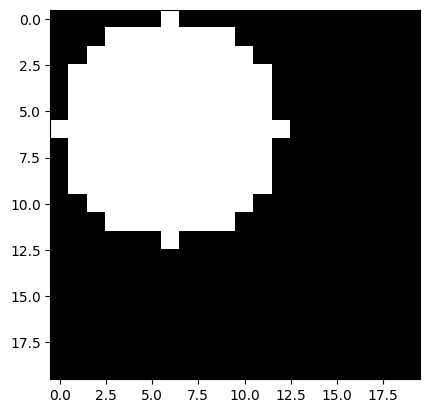

In [31]:
img = data[0, :-1].reshape((20,20))
plt.imshow(img, cmap='gray')

O rótulo referente à imagem pode ser obtido com o elemento da última coluna:

In [32]:
data[0, 400]

-1.0

Como você pode observar, o rótulo igual a -1 é usado para identificar os círculos. Além disso, vale notar também que a resolução de 20x20 considerada na digitalização da figura do círculo causa uma distorção considerável. No entanto, vamos utilizar essa resolução baixa para reduzir a dimensionalidade do problema e tornar o treinamento mais rápido.

A quinta linha da matriz (índice 4) representa um quadrado:

1.0


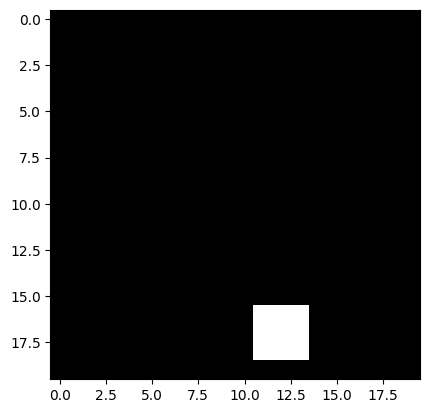

In [33]:
img = data[4, :-1].reshape((20,20))
print(data[4, -1])
plt.imshow(img, cmap='gray')

Podemos verificar que, quando a imagem é um círculo o último valor da linha vale -1 e se for um quadrado vale 1.

# Seleção de dados para treinamento do perceptron

Para dividir a base de dados em treinamento e teste, serão usadas as 800 primeiras linhas para o treinamento do perceptron, ajustando os valores dos pesos de forma iterativa e as 200 linhas finais para avaliar o desempenho do seu modelo na classificação de círculos e quadrados.

Separamos os dados em uma matriz `Xd` para o treinamento e `Xd_test` para o teste:

In [34]:
# Treinamento
Xd = data[:800, :-1]  # Dados de treinamento
d = data[:800, -1]    # Rótulos de treinamento

# Teste
Xd_test = data[800:, :-1]  # Dados de teste
d_teste = data[800:, -1]   # Rótulos

## Função _hard limiter_ e função _Perceptron_

Criamos uma função para ser nossa função não linear $\varphi(.)$

In [35]:
# Função sinal
def sgn(v):
  return np.where(v < 0, -1, 1)
    #return -1 if v < 0 else 1

Agora, vamos criar a função que vai ser usada para o treinamento do perceptron de Rosenblatt iterativamente.

Os parâmetros dessa função serão:
1. A matriz `Xd`
1. O passo de adaptação $\eta$
1. O número de épocas $N_e$
1. O tamanho do mini-batch $N_b$

In [36]:
def perceptron(X, d, eta, Ne, Nb):
    Nt = X.shape[0]
    n_features = X.shape[1]
    w = np.zeros(n_features)  # Inicializar os pesos

    for _ in range(Ne):
        indices = np.random.permutation(Nt)  # Embaralhar os índices
        X = X[indices]
        d = d[indices]

        for start in range(0, Nt, Nb):
            end = start + Nb
            batch_X = X[start:end]
            batch_d = d[start:end]

            v = batch_X.dot(w)
            y = sgn(v)
            e = batch_d - y

            w += eta * (batch_X.T.dot(e)) / Nb  # Atualização dos pesos

    return w

## Treinamento do modelo

Dados de treinando do perceptron:

1. $\eta = 0.001$
1. $N_e = 3000$
1. $N_b = 1$

Com isso obtemos nosso vetor $w$:

In [37]:
w = perceptron(Xd, d, 0.001, 3000, 1) # Define os pesos com os dados de treino
w

array([ 1.68000000e-01,  1.80000000e-01, -3.24000000e-01,  2.80000000e-02,
       -2.38000000e-01,  3.74000000e-01, -5.58000000e-01,  7.14000000e-01,
       -6.20000000e-02,  1.94000000e-01, -4.60000000e-02,  1.66000000e-01,
       -3.82000000e-01,  1.74000000e-01, -2.40000000e-01,  1.82000000e-01,
        2.00000000e-02,  0.00000000e+00,  2.00000000e-02,  0.00000000e+00,
        1.88000000e-01,  7.80000000e-02,  1.34000000e-01, -1.26000000e-01,
       -2.00000000e-03,  2.00000000e-03,  7.00000000e-02,  1.96000000e-01,
       -7.40000000e-02,  6.60000000e-02, -7.60000000e-02,  8.00000000e-03,
       -2.28000000e-01, -5.20000000e-02,  1.52000000e-01,  3.60000000e-02,
        3.14000000e-01,  5.80000000e-02, -1.80000000e-02,  8.00000000e-03,
       -3.16000000e-01,  4.20000000e-02, -1.46000000e-01,  1.44000000e-01,
        3.52000000e-01, -4.62000000e-01, -3.82000000e-01,  1.38000000e-01,
        7.60000000e-02,  1.00000000e-02,  8.00000000e-03,  1.24000000e-01,
        2.60000000e-02, -

# Uso do modelo para teste

Após o treinamento, vamos avaliar o modelo criado com os dados dos conjuntos de treinamento e de teste, medindo a acurácia do classificador para ambos os casos.

Assim, vamos preparar a matriz X de teste, calcular com os pesos calculados anteriormente e verificar a acurácia.

In [38]:
# Função de previsão
def predict(X, w):
    return sgn(X.dot(w))

In [39]:
y_pred = predict(Xd_test, w)
acuracia = np.mean(d_teste == y_pred) * 100
print(f'Acurácia = {acuracia:.2f}%')

Acurácia = 64.00%
